Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says 
- `YOUR CODE HERE`
- "YOUR ANSWER HERE"
- `raise NotImplementedError()`

as well as fill in your name and collaborators below:

In [ ]:
NAME = "Carter Alzamora"
COLLABORATORS = "Ben Carr"

---

# Bi 621 – Problem Set 9

Your goal for this assigment is to re-write your PS4 assignment (part 3) using Numpy - this means you be using an "array of arrays" instead of a "list of lists". You may implement this however you wish, as long as you use numpy arrays, and not built-in Python lists.

You may find it helpful to use your `bioinfo` python module.

## Part 1
You should read in `lane1_NoIndex_L001_R1_003.fastq` and calculate the mean, variance, standard deviation, and median of each of the 101 quality score positions. Additionally, calculate new statistics of the 25th and 75th quantile for each of the 101 positions. Be sure to print these values. 

In [22]:
import numpy as np
import bioinfo
# file = "../../lane1_NoIndex_L001_R1_003.fastq" #do not change this path - move your file to this location
file = "../../test.fastq"
# test file = 200 reads 
# fsatq = 4 mil reads

reads = 200
qual_line = -1 
# -1 for zero based 
all_qscores_array = np.zeros((101,reads), dtype = int) 

#101 each holding the [reads] number of q scores at THAT position 

with open (file) as fq_all:
    #get total line number from file 
    for indexnum, contents in enumerate(fq_all): #this asigns the index location to indexnum and the actual score to contents
        if (indexnum)%4 == 3: # starting at index 3 count by 4 in order to only get q scores
            qual_line += 1  #incriment up the counter of the read LINE (array number) by one every time we hit a new line of q scores           
            for score_index, score in enumerate(contents.strip('\n')): # set score_index equal to the position of this score in the line 
                converted_score = bioinfo.convert_phred(score)
                
                all_qscores_array[score_index,qual_line] = converted_score 
                #each array contains all of the q scores for THAT position RATHER than all the q scores for one read 



print (all_qscores_array)

# YOUR CODE HERE
# raise NotImplementedError()

[[34 34 34 ... 34 34 34]
 [34 34 34 ... 34 34 34]
 [34 34 34 ... 34 34 34]
 ...
 [36 35 29 ... 33 35  2]
 [35 35 24 ... 33 35  2]
 [35 25 27 ...  2 31  2]]


In [67]:
#use this cell to calculate Mean, Variance, Stdev, Median, 25th percentile, and 75th percentile
#store in np arrays called: mean, var, stdev, median, p25, p75

#HINT: There are some VERY USEFUL numpy functions you can use to do this
#check out https://numpy.org/doc/stable/reference/routines.statistics.html
#Be sure to specify ddof = 1 when calculating the variance and standard deviation
mean = np.zeros(101)
var = np.zeros(101)
stdev = np.zeros(101)
median = np.zeros(101)
p25 = np.zeros(101)
p75 = np.zeros(101)
for read_index, pos_score_array in enumerate(all_qscores_array): #read index = index for the array 
    #pos_sscore array = array containting scores 
    m = np.mean(pos_score_array) # mean the array at [read_index] position 
    mean[read_index] = m # append the mean it to the array at the [read_index] position
    v = np.var(pos_score_array, ddof = 1)
    var[read_index] = v
    sd =  np.std(pos_score_array,ddof = 1)
    stdev[read_index] = sd
    med = np.median(pos_score_array)
    median[read_index] = med
    P25 = np.percentile(pos_score_array, 25) 
    p25[read_index] = P25
    P75 = np.percentile(pos_score_array, 75) 
    p75[read_index] = P75

print(mean)
# raise NotImplementedError()

[32.62  32.73  32.67  36.075 35.565 35.92  36.135 36.3   38.475 38.49
 38.41  38.16  37.02  38.255 38.525 38.395 38.565 38.305 38.175 37.705
 37.905 38.085 37.995 38.115 37.36  38.    37.54  37.655 37.075 37.355
 37.03  36.98  37.435 37.09  37.025 37.065 37.21  37.115 37.1   36.685
 36.6   36.96  36.635 36.66  36.835 36.275 35.745 35.875 35.54  35.545
 35.94  35.1   35.295 35.48  35.335 34.975 34.89  34.455 34.05  34.05
 33.6   33.525 33.56  34.01  33.485 32.98  33.07  32.91  32.905 32.455
 32.07  32.085 31.3   31.46  31.54  29.995 30.285 31.345 31.365 31.285
 31.365 30.875 30.54  30.685 30.92  31.03  30.65  30.31  30.1   30.455
 30.425 30.095 30.245 29.865 29.665 29.575 29.1   29.12  29.06  28.845
 26.395]


In [57]:
#Use this cell to print out Pos, Mean, Variance, Stdev, Median, 25th and 75th percentiles
#Be sure to use tab separation
print(f"Read Position\tMean\tVariance\tStdev\tMedian\t25th percentile\t75th percentile")
for read_index, pos_score_array in enumerate(all_qscores_array):
    print(f"{read_index}\t{mean[read_index]}\t{var[read_index]}\t{var[read_index]}\t{stdev[read_index]}\t{median[read_index]}\t{p25[read_index]}\t{p75[read_index]}")

# raise NotImplementedError()

Read Position	Mean	Variance	Stdev	Median	25th percentile	75th percentile
0	32.62	4.317185929648242	4.317185929648242	2.0777838986882737	34.0	31.0	34.0
1	32.73	4.399095477386935	4.399095477386935	2.097402078140225	34.0	31.0	34.0
2	32.67	4.945829145728644	4.945829145728644	2.2239220188056605	34.0	31.0	34.0
3	36.075	5.285804020100502	5.285804020100502	2.299087649503712	37.0	37.0	37.0
4	35.565	15.925402010050245	15.925402010050245	3.99066435697745	37.0	35.0	37.0
5	35.92	6.084020100502512	6.084020100502512	2.4665806495029736	37.0	35.75	37.0
6	36.135	2.6701256281407035	2.6701256281407035	1.6340519049714128	37.0	35.0	37.0
7	36.3	5.366834170854271	5.366834170854271	2.3166428664889787	37.0	37.0	37.0
8	38.475	2.733040201005026	2.733040201005026	1.6531909148688866	39.0	39.0	39.0
9	38.49	2.472261306532663	2.472261306532663	1.5723426174128408	39.0	39.0	39.0
10	38.41	9.217989949748743	9.217989949748743	3.0361142846982463	39.0	39.0	39.0
11	38.16	16.466733668341707	16.466733668341707	4.057922333946487

In [53]:
###autograder tests, do not change

assert len(mean) == len(var) == len(stdev) == len(median) == len(p25) == len(p75) == 101, "wrong length"
print("Stats exist")

Stats exist


## Part 2
Plot the distributions of qscores for position 6 and 95 seperately.

Text(0.5, 1.0, 'Distribution of Quality Scores at Position 6')

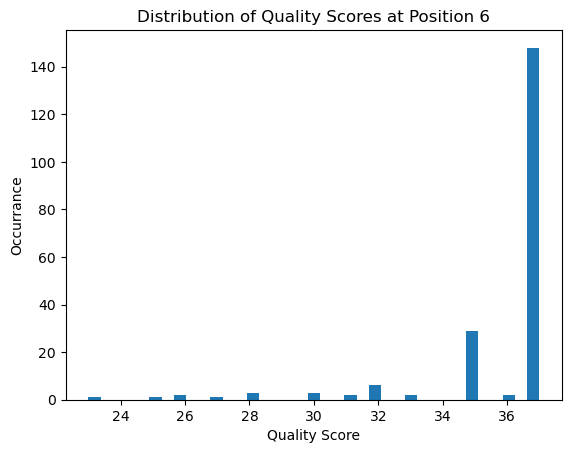

In [66]:
# use this cell to plot the distribution of qscores for position 6 #
# feel free to use hist from matplotlib

import matplotlib.pyplot as plt

# print(all_qscores_array[0])
plt.hist(all_qscores_array[5], bins = max(all_qscores_array[5]))

plt.xlabel("Quality Score")
plt.ylabel("Occurrance")
plt.title("Distribution of Quality Scores at Position 6")
# YOUR CODE HERE
# raise NotImplementedError()


Text(0.5, 1.0, 'Distribution of Quality Scores at Position 95')

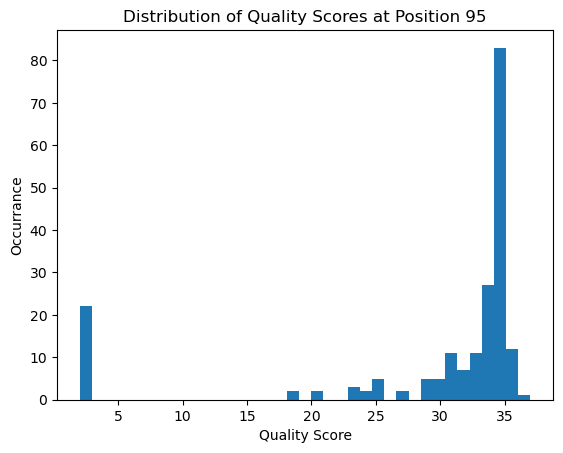

In [65]:
# use this cell to plot the distribution of qscores for position 95 #
plt.hist(all_qscores_array[94], bins = max(all_qscores_array[94]))

plt.xlabel("Quality Score")
plt.ylabel("Occurrance")
plt.title("Distribution of Quality Scores at Position 95")
# YOUR CODE HERE
# raise NotImplementedError()

## Part 3
Plot the mean and standard deviation for each of the 101 positions in one plot, and plot the median and 25th and 75th percentiles, in a manner similar to standard deviaion, in a seperate plot. Read position should be along the x-axis.

Text(0.5, 1.0, 'Mean Quality Scores for Base Pair at Position X with Standard Deviation ')

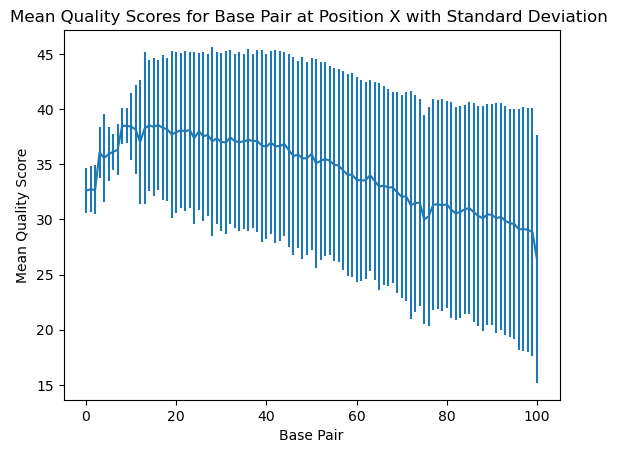

In [78]:
#use this cell to create your mean and standard deviation plot
#be sure to plot stdev as error bars

plt.errorbar(range(101), mean, stdev)

plt.xlabel("Base Pair")
plt.ylabel("Mean Quality Score")
plt.title("Mean Quality Scores for Base Pair at Position X with Standard Deviation ")


# YOUR CODE HERE
# raise NotImplementedError()

Text(0.5, 1.0, 'Median Quality Scores for Base Pair at Position X with 25th and 75th Percentiles')

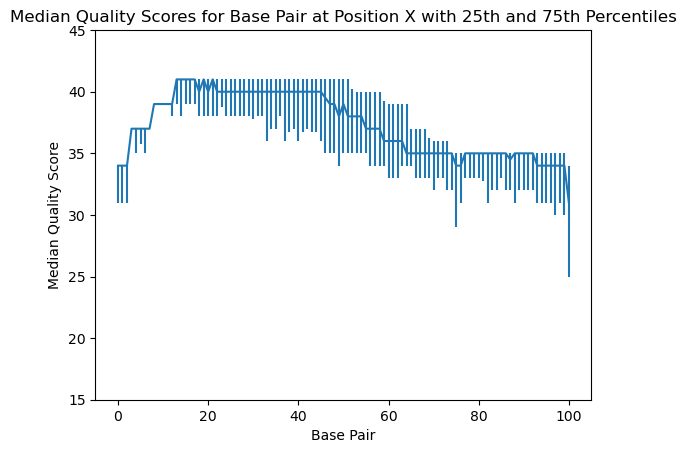

In [105]:
#use this cell to create your median and quantile/percentile plot
#hint: you need to find the difference between the median and the quantile and join the two arrays to use plt.errorbar
diff25 = median - p25
diff75 = p75 - median

plt.errorbar(range(101), median, yerr = (diff25, diff75))

plt.ylim(15 ,max(diff75) + max(median))

plt.xlabel("Base Pair")
plt.ylabel("Median Quality Score")
plt.title("Median Quality Scores for Base Pair at Position X with 25th and 75th Percentiles")



# Question

Which of the two plots would you suggest using to represent the data and why?
- Hint 1: what's the difference between standard deviation and the 25th and 75th percentiles?
- Hint 2: it may help if you plot both on the same axis scale to better compare.

I would argue the second plot of the quartiles is a better representation of the data. This is a good visual demonstration of how tight the quality scores are at each position vs the range in the standard deviation which shows a much more dispersed data pattern. the 